In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
def dist(U,N):
    random.seed(10)
    d=500
    i=0
    c=set()
    User=[]
    Base=[]
    while len(c)<U+N:
        x=random.uniform(0,d)
        y=random.uniform(0,d)
        c.add((x,y))
    for (x,y) in c:
        if(i<U):
            User.append((x,y))
        else:
            Base.append((x,y))
        i=i+1
    return (User,Base)


In [3]:
def plot_map(s1,c1,s2,c2):
    X1=[]
    Y1=[]
    X2=[]
    Y2=[]
    numusers=len(s1)
    numbs=len(s2)
    for (x,y) in s1:
        X1.append(x)
        Y1.append(y)
    for (x,y) in s2:
        X2.append(x)
        Y2.append(y)
    plt.scatter(X1,Y1,color=c1,)
    plt.scatter(X2,Y2,color=c2)
    plt.xlabel('X')
    plt.xlim(-100,800)
    plt.ylim(-100,800)
    plt.ylabel('Y')
    plt.title("map for "+str(numusers)+" users and "+str(numbs)+" base stations")
    plt.legend(["users", "base station"], loc ="upper right")

In [4]:
def channel_gain(User,Base,H,g0,U,N):
    g=np.zeros((U,N))
    for i in range(U):
        (Ux,Uy)=User[i]
        for j in range(N):
            (Bx,By)=Base[j]
            d=(Ux-Bx)**2 + (Uy-By)**2 + H**2
            g[i][j]=g0/d
    return g
    

In [5]:
def channel_gain2(User,Base,H,g0,U,N):
    g=np.zeros((U,N))
    for i in range(U):
        (Ux,Uy)=User[i]
        for j in range(N):
            (Bx,By)=Base[j]
            d=((Ux-Bx)**2 + (Uy-By)**2 + H**2)**2
            g[i][j]=g0/d
    return g

In [6]:
def power_allocation3(g,sigma_0,pmax,Iu,B,U,N):
    p=pmax*np.ones((U,N))
    E=np.zeros((U,1))
    E_store=np.zeros((U,N))
    r=0
    E_prev=0;
    while r>=0:
        r=r+1
        for j in range(N):
            pr=p[:,j].reshape((U,1))
            Er=np.zeros((U,1))
            for i in range(U):
                mu_r=0.1/np.sqrt(r)
                den=sigma_0 + ((g[:,j]*pr[:,0]).sum()) - g[i,j]*pr[i,0]
                gamma=g[i,j]/den
                hpun=np.log2(1+gamma*pr[i,0])
                gpun=np.log(2*(1+gamma*pr[i,0]))
                denr=B*(gpun*hpun*hpun)
                del_r=mu_r*(Iu[i,0]*(hpun*gpun - gamma*pr[i,0]))/denr
                pr[i,0]=pr[i,0]-del_r
                if(pr[i,0]<0):
                    pr[i,0]=0
                Er[i,0]=(pr[i,0]*Iu[i,0])/(B*hpun)
            E_store[:,j]=Er[:,0]
            p[:,j]=pr[:,0]
        E=E_store.min(axis=1)
        E_new=E.sum()
        p1=p.min(axis=1)
        p1=p1.reshape((U,1))
        p=p1*np.ones((U,N))
        if(r>1):
            if(abs(E_prev-E_new)<0.5):
                break
            E_prev=E_new
    Etot=E_new/100
    print("number of iterations for convergence: " + str(r))
    return (p,E,Etot)
           

number of iterations for convergence: 22
[[3.8105068  3.8105068  3.8105068  3.8105068  3.8105068 ]
 [3.86802499 3.86802499 3.86802499 3.86802499 3.86802499]
 [3.82748844 3.82748844 3.82748844 3.82748844 3.82748844]
 [3.81959732 3.81959732 3.81959732 3.81959732 3.81959732]
 [3.80838698 3.80838698 3.80838698 3.80838698 3.80838698]
 [3.86999242 3.86999242 3.86999242 3.86999242 3.86999242]
 [3.84912521 3.84912521 3.84912521 3.84912521 3.84912521]
 [3.82108303 3.82108303 3.82108303 3.82108303 3.82108303]
 [3.8177548  3.8177548  3.8177548  3.8177548  3.8177548 ]
 [3.84139896 3.84139896 3.84139896 3.84139896 3.84139896]
 [3.8012502  3.8012502  3.8012502  3.8012502  3.8012502 ]
 [3.8584369  3.8584369  3.8584369  3.8584369  3.8584369 ]
 [3.87287065 3.87287065 3.87287065 3.87287065 3.87287065]
 [3.81432258 3.81432258 3.81432258 3.81432258 3.81432258]
 [3.81861266 3.81861266 3.81861266 3.81861266 3.81861266]
 [3.8374765  3.8374765  3.8374765  3.8374765  3.8374765 ]
 [3.86355704 3.86355704 3.86355

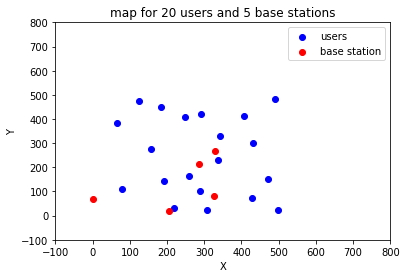

In [7]:

# Setup 

U=20 #number of users
N=5  #number of Base stations
H=10 #BS hieght in (m)
g0=1 #channel gain at a dist of 1m
pmax=4 #maximum transmission power of user
B=20*(10**6) # Bandwidth
sigma_0=10**-13
random.seed(10)
Iu=[]
for i in range(U):
    Iu.append(random.randint(600,1000))
Iu=8*1024*np.reshape(Iu,(U,1))
User,Base=dist(U,N)
plot_map(User,"blue",Base,"red")
g=channel_gain(User,Base,H,g0,U,N)
(pa,E,Etot)=power_allocation3(g,sigma_0,pmax,Iu,B,U,N)
print(pa)
print(E)
print(Etot)

In [11]:
def uplink_rate(g,p,sigma_0,B,U,N):
    nr=p*g
    dr=np.zeros((U,N))
    v=np.zeros((U,N))
    for i in range(N):
        for j in range(U):
            dr[j,i]=sigma_0+(g[:,i]*p[:,i]).sum()-g[j,i]*p[j,i]
    inner=(1+nr/dr)
    v=np.log2(inner)
    return v

In [12]:
def total_time(Iu,v,R,Rc,x,U,N):
    Iq=Iu*(np.ones((U,N)))
    tup=Iq/v
    tpro=np.zeros((U,N))
    for i in range(U):
        for j in range(N):
            if(x[i,j]==0):
                tpro[i,j]=Iq[i,j]/Rc
            else:
                tpro[i,j]=Iq[i,j]/R[i,j]
    return (tpro+tup,tpro)


In [13]:
def edge_system_utility(tq,Tgq,Tbq,alpha,U,N):
    kq=np.zeros((U,N))
    Tavg=(Tgq+Tbq)/2
    for i in range(U):
        for j in range(N):
            if(tq[i,j]<=Tgq):
                kq[i,j]=1
            elif(tq[i,j]<=Tavg and tq[i,j]>Tgq):
                kq[i,j]=1-1/(1+np.exp((alpha*(Tavg-tq[i,j])/(Tavg-Tgq))))
            elif(tq[i,j]>Tavg and tq[i,j]<=Tbq ):
                kq[i,j]=1/(1+np.exp((alpha*(tq[i,j]-Tavg)/(Tbq-Tavg))))
            else:
                kq[i,j]=0
    return kq

In [14]:
def edge_system_cost(x,tpro,Pbs,Pc,alpha,U,N):
    E_residue=100
    cq=np.zeros((U,N))
    E_pro=np.zeros((U,N))
    for i in range(U):
        for j in range(N):
            if(x[i,j]==0):
                E_pro[i,j]=Pc*tpro[i,j]
                cq[i,j]=np.exp(E_residue-E_pro[i,j])
            else:
                E_pro[i,j]=Pbs*tpro[i,j]
                cq[i,j]=np.exp(E_residue-E_pro[i,j])
    return (alpha*cq,E_pro)

In [16]:
def RO(U,N):
    random.seed()
    x=np.zeros((U,N))
    for i in range(U):
        j=random.randint(0,N-1)
        x[i,j]=1
    return x

In [17]:
def RA(U,N,Rn):
    random.seed()
    R=np.zeros((U,N))
    for j in range(N):
        if(R[:,j].sum()>Rn):
            j=j-1
        for i in range(U):
            R[i,j]=random.uniform(1,Rn)
    return R

In [18]:
def M(x,kq,epsilon,E_pro):
    return (((1-x)*(epsilon*kq + (1-epsilon)*E_pro)).sum(axis=0)).sum()
    

In [19]:
def W(x,kq,cq):
    return ((x*(kq-cq)).sum(axis=0)).sum()

In [20]:

#Function to find index of list
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    temp=list(values)
    while(len(sorted_list)!=len(list1)):
        #if index_of(min(values),values) in list1:
        sorted_list.append(index_of(min(temp),temp))
        temp[index_of(min(temp),temp)] = math.inf
    return sorted_list

#Function to carry out NSGA-II's fast non dominated sort
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front

#Function to calculate crowding distance
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1)
    sorted2 = sort_by_values(front, values2)
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        t=distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
        distance[k] = t[0]
    for k in range(1,len(front)-1):
        t=distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
        distance[k] = t[0]
    return distance

#Function to carry out the crossover
def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

#Function to carry out the mutation operator
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1:
        solution = min_x+(max_x-min_x)*random.random()
    return solution


In [21]:
def generate_sol(X_pop,R_pop,pop_size,U,N):
    pop_no=0;
    value_1=np.zeros((pop_size,1))
    value_2=np.zeros((pop_size,1))
    while pop_no<pop_size:
        Rc=120*(10**9)
        v=(10**9)*uplink_rate(g,pa,sigma_0,B,U,N)
        (tq,tpro)=total_time(Iu,v,R_pop[:,:,pop_no],Rc,X_pop[:,:,pop_no],U,N)
        Tgq=0.4
        Tbq=0.5
        alpha=(0.25)*10**(-43)
        Pbs=10
        Pc=10000
        epsilon=1
        kq=edge_system_utility(tq,Tgq,Tbq,alpha,U,N)
        (cq,E_pro)=edge_system_cost(X_pop[:,:,pop_no],tpro,Pbs,Pc,alpha,U,N)
        value_1[pop_no]=W(X_pop[:,:,pop_no],kq,cq)
        value_2[pop_no]=-M(X_pop[:,:,pop_no],kq,epsilon,E_pro)
        pop_no=pop_no+1
    return (value_1,value_2)

In [23]:
def nsga2(U,N,g,pa,sigma_0,B,Iu,pop_size=20,gen_max=100):
    #generate a random pop
    gen_no=0;
    pop_no=0
    X_pop=np.zeros((U,N,pop_size))
    R_pop=np.zeros((U,N,pop_size))
    value_1=np.zeros((pop_size,1))
    value_2=np.zeros((pop_size,1))

    #generate initial solutions (Resource allocation and Offloading Decision) to find values of opti function (value_1 ,value_2)
    while pop_no<pop_size:
        R=RA(U,N,60)
        R_pop[:,:,pop_no]=R*(10**9)
        X_pop[:,:,pop_no]=RO(U,N)
        Rc=120*(10**9)
        v=(10**9)*uplink_rate(g,pa,sigma_0,B,U,N)
        (tq,tpro)=total_time(Iu,v,R_pop[:,:,pop_no],Rc,X_pop[:,:,pop_no],U,N)
        Tgq=0.4
        Tbq=0.5
        alpha=(0.25)*10**(-43)
        Pbs=10
        Pc=10000
        epsilon=1
        kq=edge_system_utility(tq,Tgq,Tbq,alpha,U,N)
        (cq,E_pro)=edge_system_cost(X_pop[:,:,pop_no],tpro,Pbs,Pc,alpha,U,N)
        pop_no=pop_no+1
    (value_1,value_2)=generate_sol(X_pop,R_pop,pop_size,U,N)
    while gen_no<gen_max:
        non_dominated_sorted_solution=fast_non_dominated_sort(value_1, value_2)
        temp1=value_1[:]
        temp2=value_2[:]
        non_dominated_sorted_solution_list=[x[0] for x in non_dominated_sorted_solution]
        if gen_no%10==0:
            print("Completed Generation number ",gen_no)
        crowding_distance_values=crowding_distance(temp1,temp2,non_dominated_sorted_solution_list)
        X_pop_new=np.zeros((U,N,2*pop_size))
        R_pop_new=np.zeros((U,N,2*pop_size))
        X_pop_new[:,:,0:pop_size]=X_pop[:,:,:]
        R_pop_new[:,:,0:pop_size]=R_pop[:,:,:]
        for i in range(pop_size):
            X_pop_new[:,:,i+pop_size]=RO(U,N)
            a1 = random.randint(0,pop_size-1)
            b1 = random.randint(0,pop_size-1)
            R=RA(U,N,60)
            R_pop_new[:,:,i+pop_size]=R*(10**9)
        (value_1_2,value_2_2)=generate_sol(X_pop_new,R_pop_new,2*pop_size,U,N)
        non_dominated_sorted_solution2=fast_non_dominated_sort(value_1_2, value_2_2)
        temp1_2=value_1_2[:]
        temp2_2=value_2_2[:]
        non_dominated_sorted_solution_list_2=[x[0] for x in non_dominated_sorted_solution2]
        crowding_distance_values2=crowding_distance(temp1_2,temp2_2,non_dominated_sorted_solution_list_2)
        front = sort_by_values(non_dominated_sorted_solution_list_2, crowding_distance_values2)
        front.reverse()
        for i in range(pop_size):
            idx=front[i]
            X_pop[:,:,i]=X_pop_new[:,:,idx]
            R_pop[:,:,i]=R_pop_new[:,:,idx]
        gen_no=gen_no+1
    (v1,v2)=generate_sol(X_pop,R_pop,pop_size,U,N)
    p=(v1==max(abs(v1)))
    for i in range(len(p)):
        if (p[i]==True):
            break
    Wf=v1[i][0];
    if(Wf<0):
        Wf=-Wf
    X_f=X_pop[:,:,i]
    R_f=R_pop[:,:,i]
    return Wf        

number of iterations for convergence: 3
Completed Generation number  0


C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide


Completed Generation number  10
Completed Generation number  20
Completed Generation number  30
Completed Generation number  40
Completed Generation number  50
Completed Generation number  60
Completed Generation number  70
Completed Generation number  80
Completed Generation number  90
number of iterations for convergence: 3
Completed Generation number  0
Completed Generation number  10
Completed Generation number  20
Completed Generation number  30
Completed Generation number  40
Completed Generation number  50
Completed Generation number  60
Completed Generation number  70
Completed Generation number  80
Completed Generation number  90
number of iterations for convergence: 4
Completed Generation number  0
Completed Generation number  10
Completed Generation number  20
Completed Generation number  30
Completed Generation number  40
Completed Generation number  50
Completed Generation number  60
Completed Generation number  70
Completed Generation number  80
Completed Generation numbe

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

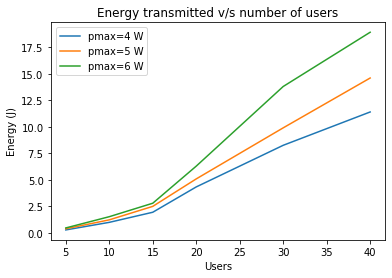

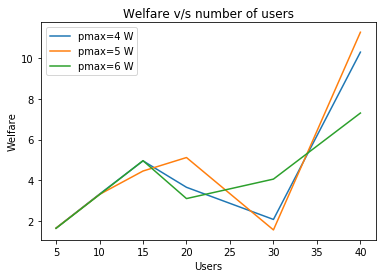

In [24]:
U=[5,10,15,20,30,40] #number of users
P=[4,5,6]
N=5  #number of Base stations
H=10 #BS hieght in (m)
g0=1 #channel gain at a dist of 1m
#pmax=4 #maximum transmission power of user
B=20*(10**6) # Bandwidth
sigma_0=10**-13
random.seed(10)
E_final=[]
wf_final=[]
for pmax in P:
    E_=[]
    wf=[]
    for u in U:
        Iu=[]
        for i in range(u):
            Iu.append(random.randint(600,1000))
        Iu=8*1024*np.reshape(Iu,(u,1))
        User,Base=dist(u,N)
        g=channel_gain(User,Base,H,g0,u,N)
        (pa,E,Etot)=power_allocation3(g,sigma_0,pmax,Iu,B,u,N)
        E_.append(Etot)
        wf_=nsga2(u,N,g,pa,sigma_0,B,Iu,20,100)
        wf.append(wf_)
    E_final.append(E_)
    wf_final.append(wf)
    fig = plt.figure()
fig = plt.figure()
for E_ in E_final:
    plt.plot(U,E_)
plt.xlabel('Users');
plt.ylabel('Energy (J)');
plt.title("Energy transmitted v/s number of users");
plt.legend(["pmax=4 W","pmax=5 W","pmax=6 W"]);

fig=plt.figure()
for wf in wf_final:
    plt.plot(U,wf)
plt.xlabel('Users');
plt.ylabel('Welfare');
plt.title("Welfare v/s number of users");
plt.legend(["pmax=4 W","pmax=5 W","pmax=6 W"]);